In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


- 1 = Basic Service
- 2 = E-Service
- 3 = Plus Service
- 4 = Total Service

In [4]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

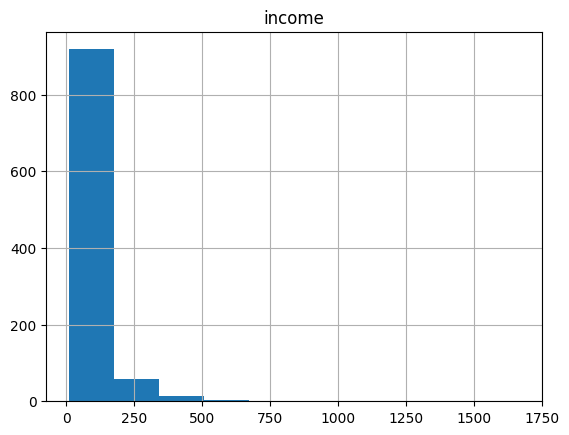

In [5]:
df.hist(column="income")

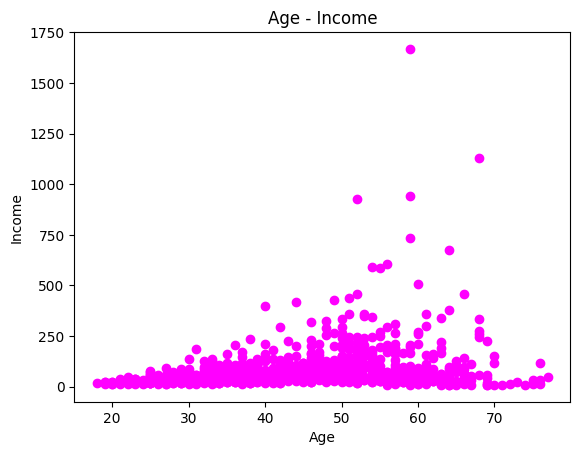

In [6]:
plt.scatter(df["age"], df["income"], color="magenta")
plt.title("Age - Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

<Axes: xlabel='age', ylabel='income'>

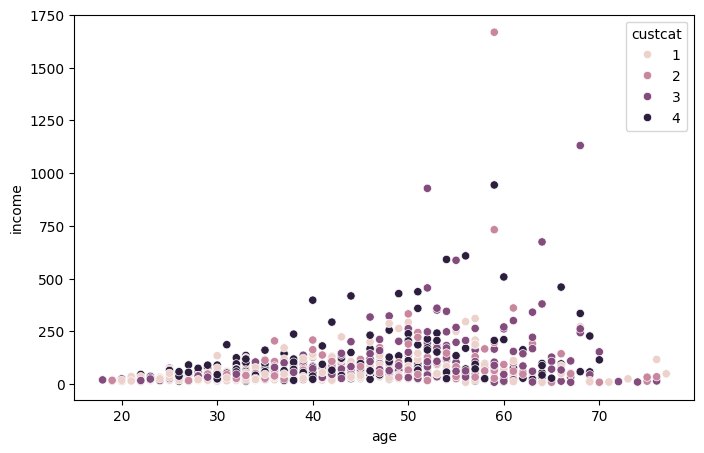

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='income', hue='custcat', data=df)

1- Pick a value for K. 
2- Calculate the distance of known case from all cases. (disdimilarity)
3- Select the K-observations in the training data that are "nearest" to the  unkonwn data point.
4- Predict the response of the unknown data point, using the most popular response value from the K-Nearest neighbors.

For unknown case, first pick K=1 Calculate and make prediction until K=20 Compare results.
* K=1 may capture the noise in data. A low value of K causes over-fitting. Prediction is not good enough for out-of-sample cases.
* K=20 The model becomes overly generalized, if value of K is too high.

* If we use 2 features (age, income), we are using it in a 2-dimensional space.
* We can also use the same distance matrix for multi-dimensional vectors.

# Exercise
- Normalize the data: StandardScaler
- Classification: KNeighborsClassifier
- Training: k=4

In [8]:
df.sample(4)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
657,1,10,28,0,9,75.0,4,1,0.0,0,1,4
258,2,37,33,0,1,102.0,2,12,0.0,0,1,4
714,2,6,35,1,6,28.0,4,3,0.0,1,3,4
273,2,48,55,0,31,26.0,1,1,0.0,0,1,1


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


In [11]:
y = df[["custcat"]]
X = df.drop("custcat", axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

scaler = StandardScaler()    
for col in X.columns:
    X_train[[col]] = scaler.fit_transform(X_train[[col]])
    X_test[[col]] = scaler.transform(X_test[[col]])

In [13]:
# scale: tenure, age, address, employ
scale = ["tenure", "age", "address", "employ", "income"]
for col in scale:
    scaler = StandardScaler()
    X_train[[col]] = scaler.fit_transform(X_train[[col]])
    X_test[[col]] = scaler.transform(X_test[[col]])

In [14]:
X_train

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
40,3,-1.176854,-0.028348,0,-0.444637,-0.438395,1,-0.385101,0.0,0,1
977,3,0.461811,0.778726,0,0.142827,0.575462,4,0.506738,0.0,0,2
829,1,-0.849121,-1.803912,0,-1.130012,-0.543277,2,-1.078755,0.0,1,2
973,3,1.725924,0.940141,0,2.198952,0.243337,1,1.200392,0.0,0,1
874,3,0.040440,0.536603,0,1.611488,-0.447135,1,-0.880568,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
400,1,0.087259,0.133066,0,-0.346726,-0.368474,3,-0.186915,0.0,0,1
118,1,0.602268,1.101555,0,0.338649,-0.010128,1,1.398578,0.0,0,1
701,2,0.040440,0.294481,0,1.024024,0.321998,3,0.407645,0.0,1,1
206,1,1.725924,2.231459,1,3.667612,-0.316033,2,3.281352,1.0,1,2


In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 1.0
Test accuracy: 0.255


In [16]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 0.56
Test accuracy: 0.3


In [17]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 0.4675
Test accuracy: 0.34


In [28]:
# Check accuracy of Ks
Ks=10
n=4
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # train and prediction for each k
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = knn.predict(X_test).reshape(-1, 1)
    mean_acc[n-1] = accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_test.shape[0])

In [29]:
mean_acc

array([0.255, 0.265, 0.275, 0.3  , 0.325, 0.29 , 0.305, 0.295, 0.33 ])

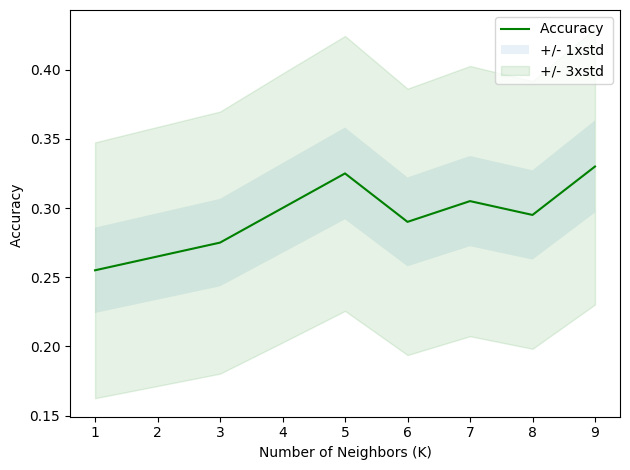

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.33 with k= 9


# Practice
* Implement the K-Nearest Neighbors (KNN) model using a different dataset.
* Research on evaluation metrics applicable to KNN. (Jaccard index, log loss, F1-score)
* Blog post about model evaluation techniques in machine learning.
* Select a real-world dataset for your final project and conduct a preliminary analysis of the data. You are expected to present your preliminary findings and outline the planned steps for the project during the lesson scheduled for next Sunday.
